![dsc-logo](https://raw.githubusercontent.com/divyake/Cysec-Hacktoberfest/dcc84465cfcff73981f8fcb5c8fe3b1710c007e1/assets/logo.svg)

<img src='https://upload.wikimedia.org/wikipedia/commons/d/d8/Deerfire_high_res_edit.jpg' width='1200px' style="vertical-align:middle"/>

<br>

**Hello reader**, we have already covered the Uni-variate and Bi-variate analysis in our previous notebooks(**Uni-variate analysis** is in **0.04_random_Forest_Regressor_Soumyadip.ipynb** and the **Bi-variate analysis** is in **Bivariate_Analysis.ipynb**). Now this time we want to find out the relationship between multiple variables using Multivariate analysis. We will be using mainly matplotlib and seaborn for visualization purposes.

## Table of Content:
1. Different Statistics of the Dataset
2. Plotting a Diagonal Correlation Matrix
3. Pair Plot
4. Correlation Plot -> Target vs All Features 
5. 3D Scatter Plot

## Importing utils:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

from string import ascii_letters
import re, random
from pylab import *
from matplotlib.pyplot import plot, show, draw, figure, cm
from mpl_toolkits.mplot3d import Axes3D

In [2]:
pd.pandas.set_option('display.max_columns',None)
pd.pandas.set_option('display.max_rows',None)

In [3]:
cm = sns.light_palette("green", as_cmap=True)

In [4]:
df = pd.read_csv('../input/forest-fire-prediction/forestfires.csv')
df.head().style.set_properties(**{'background-color': 'black',
                           'color': 'lawngreen',
                           'border-color': 'white'})

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.200000,26.200000,94.300000,5.100000,8.200000,51,6.700000,0.000000,0.000000
1,7,4,oct,tue,90.600000,35.400000,669.100000,6.700000,18.000000,33,0.900000,0.000000,0.000000
2,7,4,oct,sat,90.600000,43.700000,686.900000,6.700000,14.600000,33,1.300000,0.000000,0.000000
3,8,6,mar,fri,91.700000,33.300000,77.500000,9.000000,8.300000,97,4.000000,0.200000,0.000000
4,8,6,mar,sun,89.300000,51.300000,102.200000,9.600000,11.400000,99,1.800000,0.000000,0.000000


## Different Statistics of the Dataset:

In [5]:
df.describe().style.background_gradient(cmap='Reds')

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


# Plotting a Diagonal Correlation Matrix:

Text(0.5, 1.0, 'Fig:1')

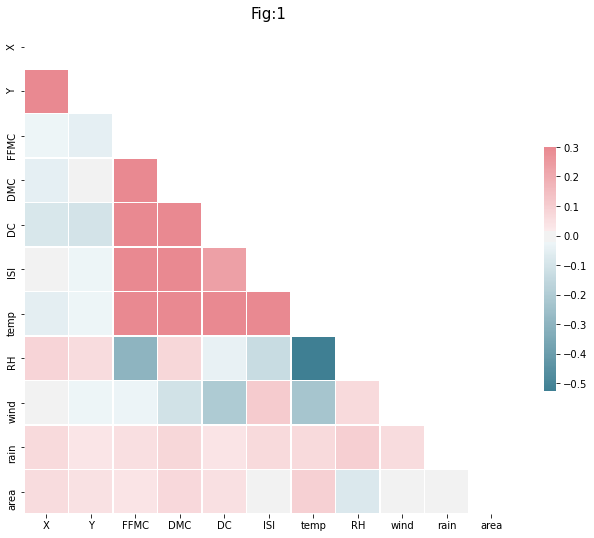

In [6]:
corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Fig:1',size=15)


### Few Observations:
- This not a regular correlation matrix its called a diagonal correlation matrix.Same as the normal correlation matrix but only the diagonal part is visible for better understanding and reduces complexity.
- Just by looking at the plot you can immediately tell that which features are related to each other which can be used for feature selection.
- For example - **'temp'** is more correlated with **'FFMC','DMC','DC'** and **'ISI'** and less related to 'RH' and 'wind' and so on.

## Pair Plot:

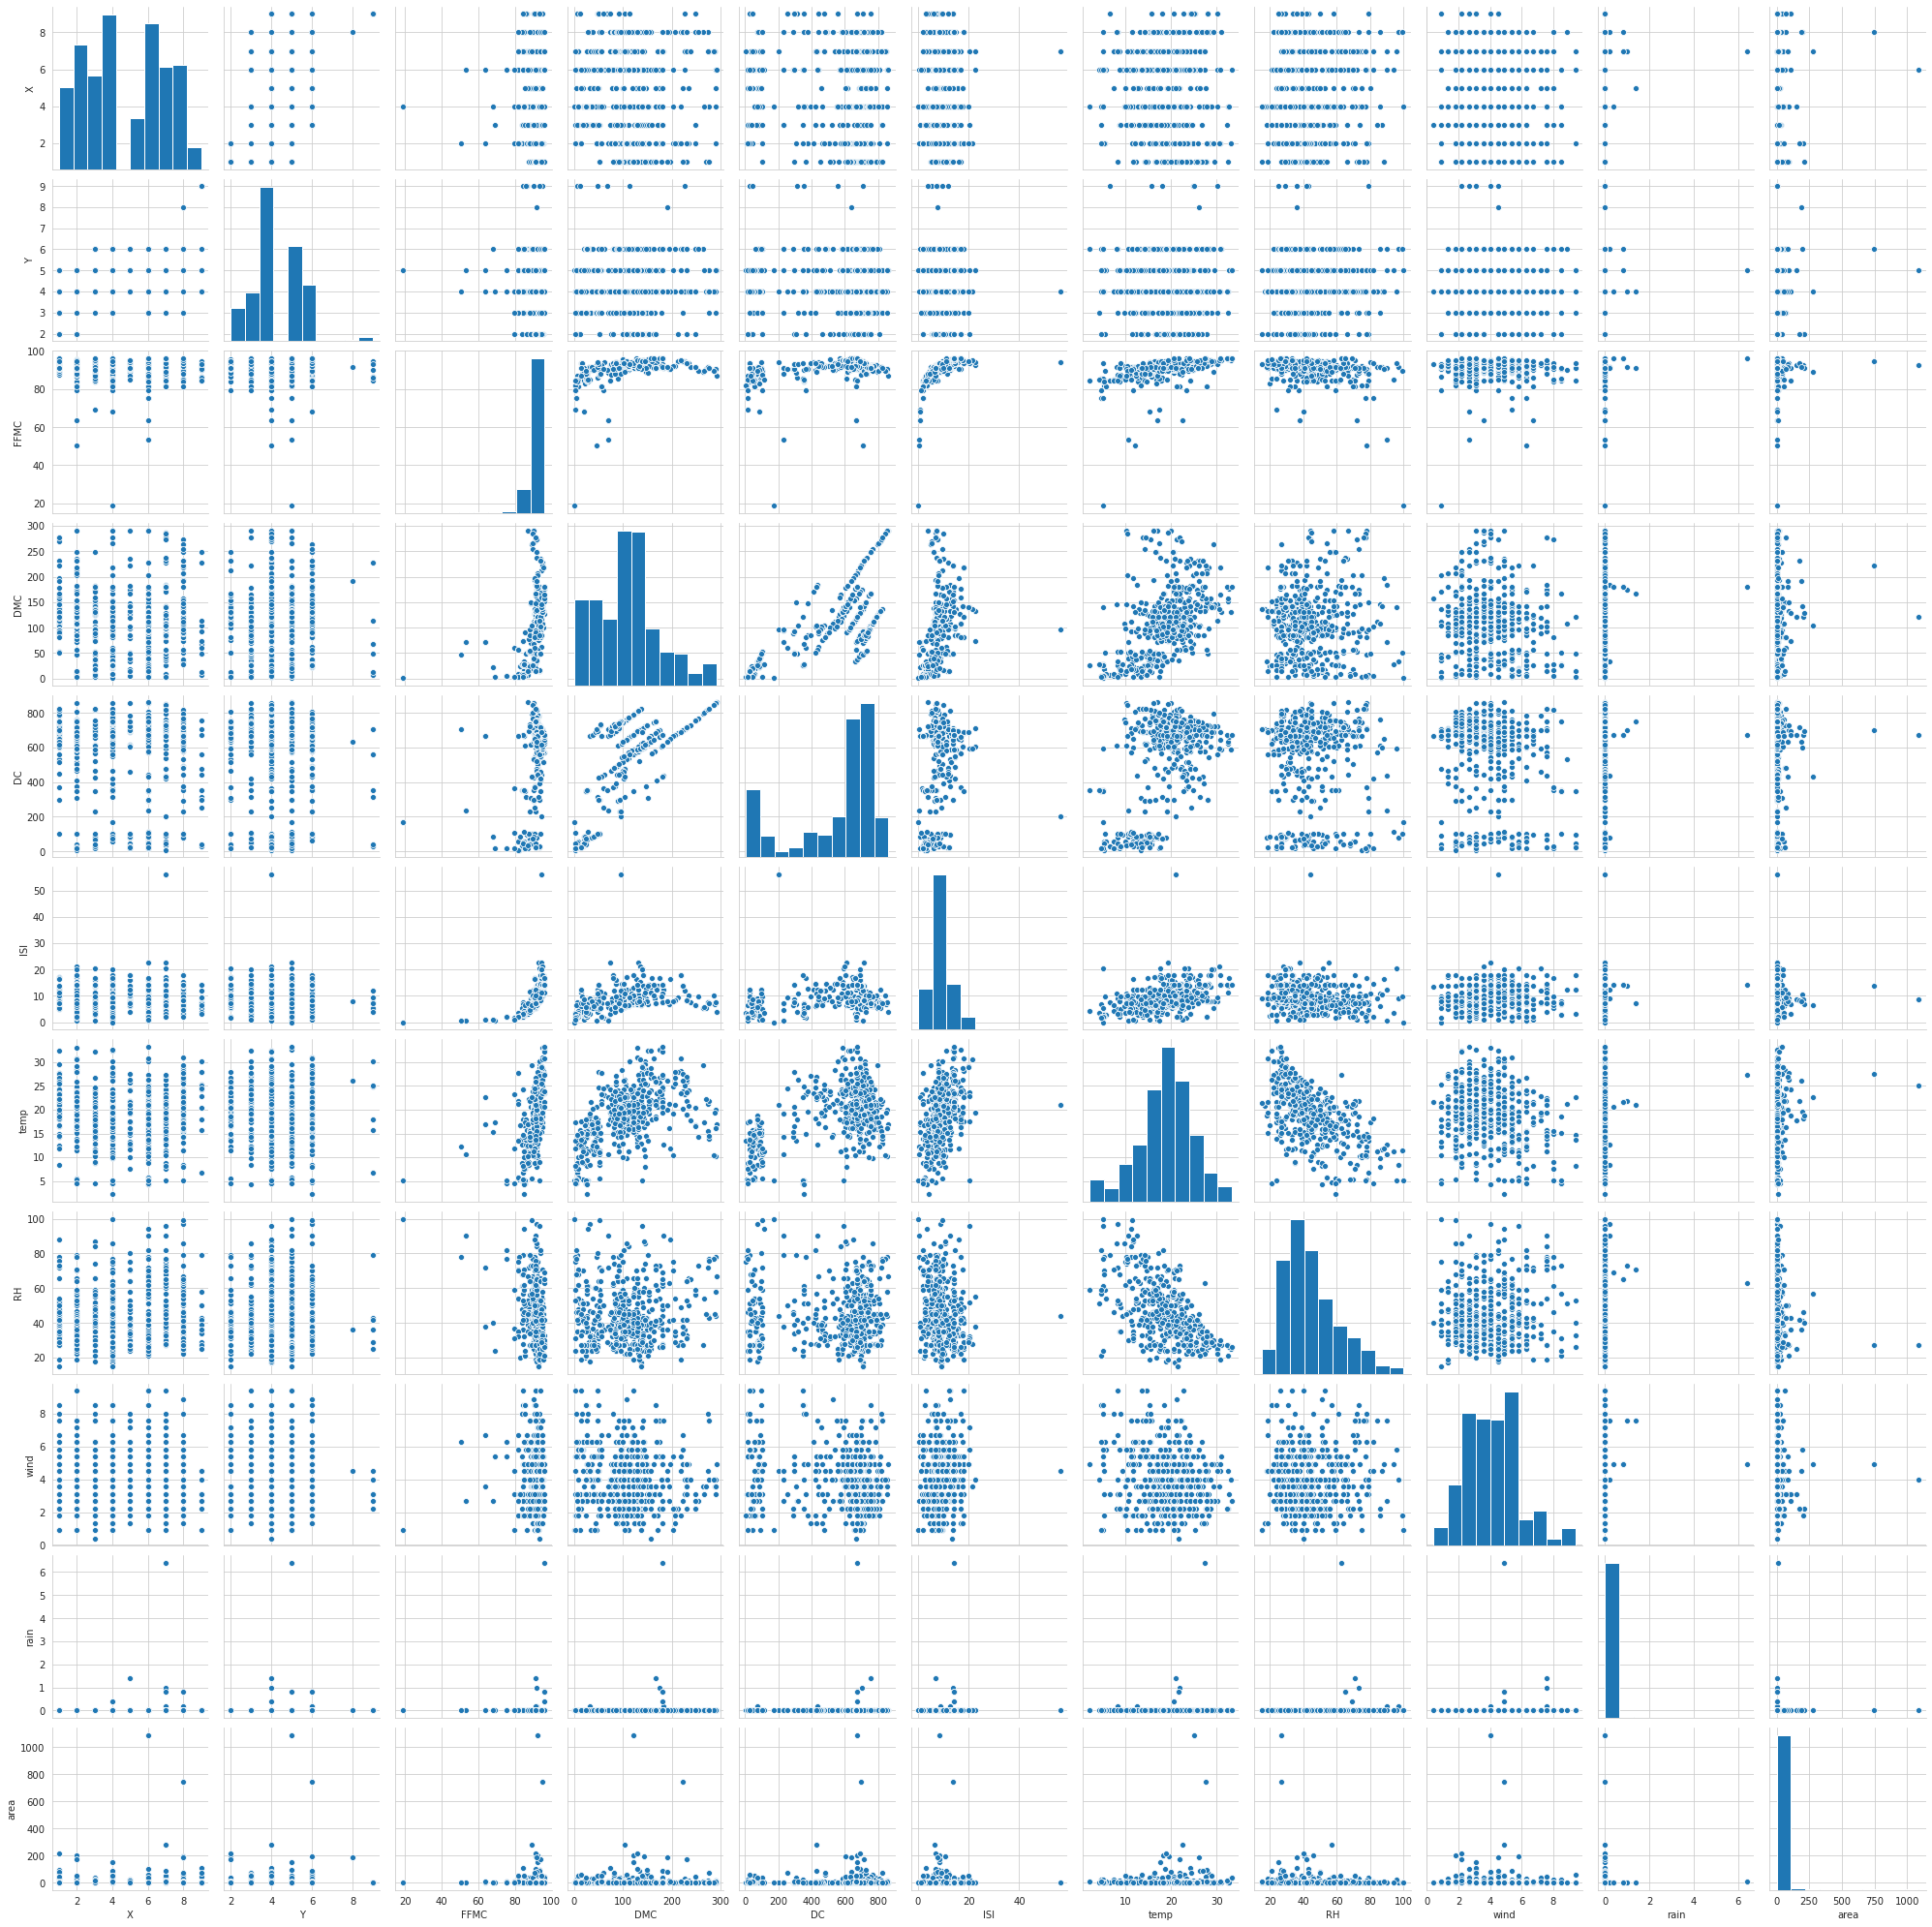

In [7]:
plt.close()
sns.set_style('whitegrid')
sns.pairplot(df)
plt.show()

### Few Observations: 
- Its a pair plot, people often use that for multivariate analysis. It is consists of histograms and scatter plots of different features.
- You can see **'temp'**, **'wind'** and **'DMC'** is normally distributed. Now, if you are familiar with the term **"Normal distribution"** or **"Gaussian distribution"** then you will be able to extract the information that lies within the distributions. If you don't know let me describe that for you, because of some random factors a histogram of a variable looks like a bell-shaped when a non-linear Regression passes through it. Most of the values will be around the mean value. Now, if we know the standard deviation and the mean, then we can predict what is the percentage of the distribution are between (mean- sd) and (mean+sd), or (mean-2 * sd) and (mean + 2 * sd) which is gonna be 68.3% and 95.4%.
> **Note**: here 'sd' means standard deviation.


## Correlation Plot -> Target vs All Features:

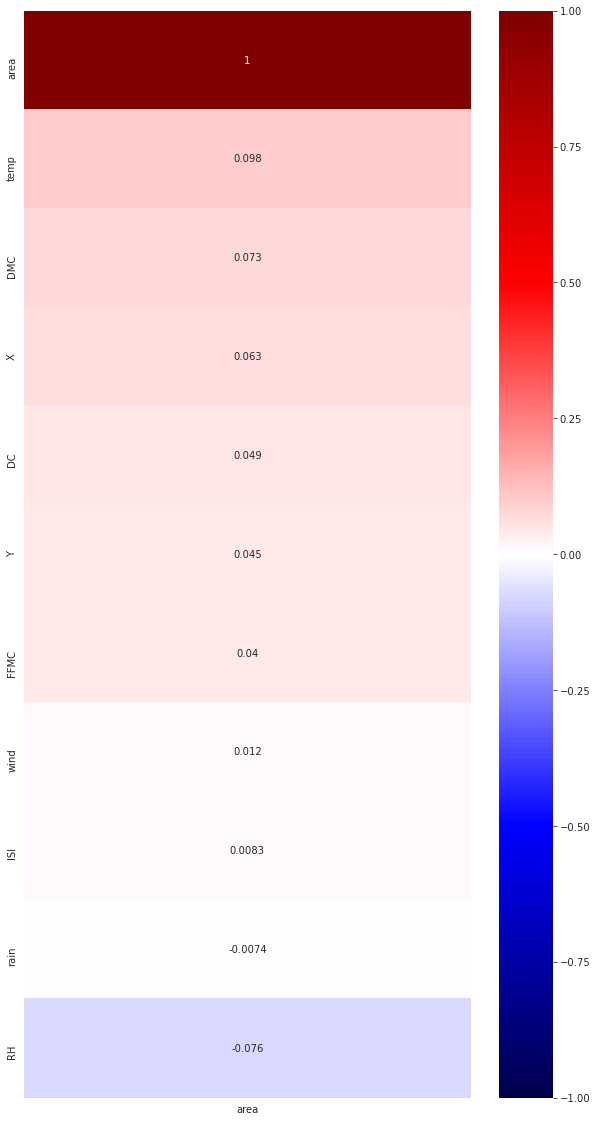

In [8]:
corr_new_train=df.corr()
plt.figure(figsize=(10,20))
sns.heatmap(corr_new_train[['area']].sort_values(by=['area'],ascending=False).head(60),vmin=-1, cmap='seismic', annot=True)

## Few Observations:
- This is the correlation plot of area(target variable) vs all the features. The values of correlation also can be seen via the plot.
- This plot helps us to do the feature selection. Most of the time domain knowledge is very important to do feature selection, but if you don't have that then you can surely use a Correlation heatmap like this and find out which is the feature most related to the target variable.
- In the **0.04_random_Forest_Regressor_Soumyadip.ipynb** notebook we have seen this plot too. I used the top six features for the model building. I did that because there is a large gap between **'FFMC'** and **'wind'** correlation values and except that I also tried to use all the features that are positively correlated but that did not help. 

## 3D Scatter plot:

In [9]:
dmc = list(df['DMC'])
temp = list(df['temp'])
area = list(df['area'])
train_f1 = pd.DataFrame(dmc,columns=['Dmc'])
train_f2 = pd.DataFrame(temp,columns=['Temp'])
train_target = pd.DataFrame(area,columns=['Target'])
train_data = pd.concat([train_f1,train_f2,train_target],axis = 1)
train_data.head(5)

,Dmc,Temp,Target
0,26.2,8.2,0.0
1,35.4,18.0,0.0
2,43.7,14.6,0.0
3,33.3,8.3,0.0
4,51.3,11.4,0.0


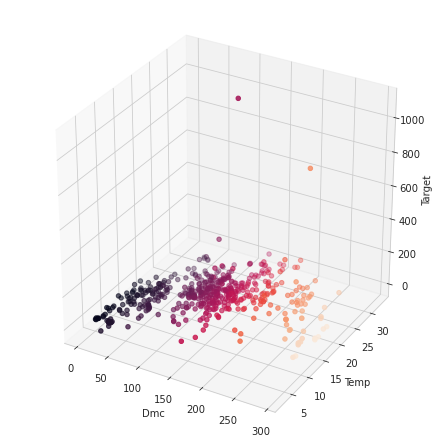

In [10]:
sns.set_style("whitegrid", {'axes.grid' : False})

fig = plt.figure(figsize=(6,6))

ax = Axes3D(fig) # Method 1
# ax = fig.add_subplot(111, projection='3d') # Method 2

x = np.random.uniform(1,20,size=20)
y = np.random.uniform(1,100,size=20)
z = np.random.uniform(1,100,size=20)


ax.scatter(train_data['Dmc'], train_data['Temp'], train_data['Target'], c=train_data['Dmc'],marker='o')
ax.set_xlabel('Dmc')
ax.set_ylabel('Temp')
ax.set_zlabel('Target')

plt.show()

## Few Observations:
- This is a 3D scatter plot between the top two correlated features which are **'DMC'** and **'temp'** and the target variable aka **'area'**.
- This plot does not help much to understand the distribution but you can see that there are some outliers in **'temp'** and **'area'**.